In [1]:
import pandas as pd
import numpy as np
# loading the dataset
file_path = 'admission_data.csv'
data = pd.read_csv(file_path)
admin = {0: '', 1: ''}
#Quick check data is uploaded or not
data_head = data.head()
data_describe = data[["Test1_Score", "Test2_Score"]].describe()
admin[0] = lambda x: (x==0).sum()
admin[1] = lambda x: (x==1).sum()
dsip = {"First 5 rows of data":data_head,
       "Data Describe":data_describe,
       "Shape":data.shape,
       "Count of nulls":np.sum(data.isna(), axis = 0),
       "Count of 0 in Admission Status":admin[0](data["Admission_Status"]),
       "Count of 1 in Admission Status":admin[1](data["Admission_Status"])} 
# data_head, data_info, data_describe, data.shape, np.sum(data.isna(), axis = 0)

# print(f'Count:\n0: {admin[0](data["Admission_Status"])}\n1: {admin[1](data["Admission_Status"])}')
# print(data_describe)

# Print the summary dictionary\
data.info()

for key, value in dsip.items():
    print(f"{key}:\n{value}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Test1_Score       200 non-null    int64
 1   Test2_Score       200 non-null    int64
 2   Admission_Status  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB
First 5 rows of data:
   Test1_Score  Test2_Score  Admission_Status
0           51           69                 0
1           92           71                 1
2           14           26                 0
3           71            8                 0
4           60           61                 0

Data Describe:
       Test1_Score  Test2_Score
count   200.000000   200.000000
mean     49.680000    50.310000
std      30.196136    30.024176
min       0.000000     0.000000
25%      24.500000    24.000000
50%      51.000000    50.500000
75%      76.250000    74.250000
max     100.000000   100.000000

Shape:
(200, 3)

Count of null

Matplotlib created a temporary cache directory at /tmp/matplotlib-18_4kawu because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


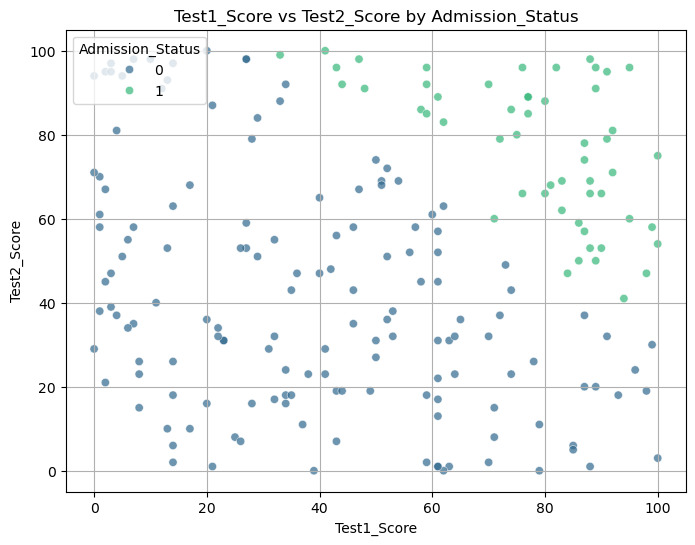

In [2]:
# Next I will calculate count of 0 and 1 in admission stat column and create scatter plots and histogram as a part of descriptive and visual analysis

import matplotlib.pyplot as plt
import seaborn as sns

# count of admission stat value
admission_counts = data['Admission_Status'].value_counts()

# Scatter plot for Test1_Score vs Test2_Score color by admission stat
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data, x='Test1_Score', y='Test2_Score', hue='Admission_Status',palette='viridis',alpha=0.7
)
plt.title('Test1_Score vs Test2_Score by Admission_Status')
plt.xlabel('Test1_Score')
plt.ylabel('Test2_Score')
plt.legend(title='Admission_Status',loc='upper left')
plt.grid(True)
plt.show()

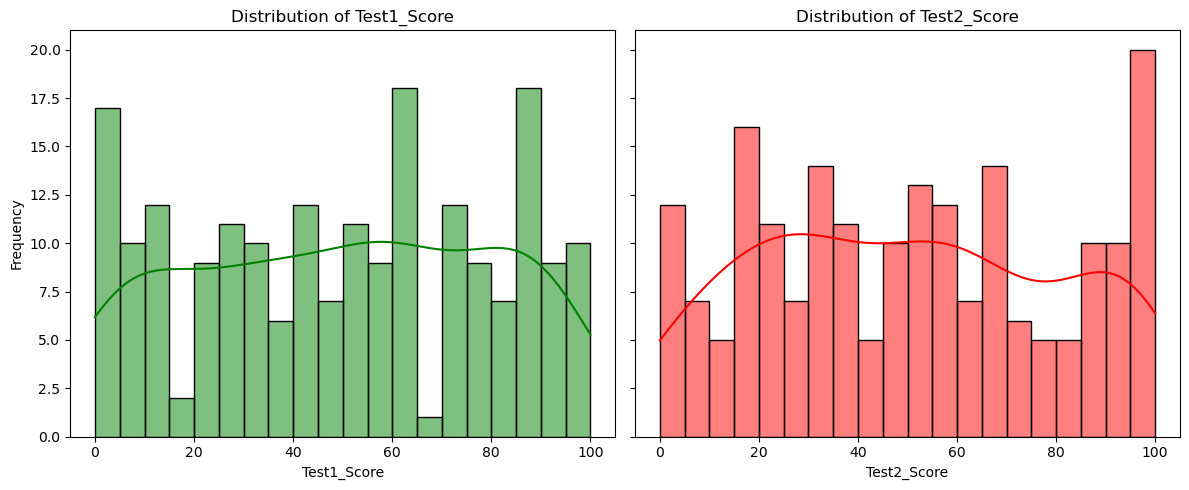

Admission_Status
0    146
1     54
Name: count, dtype: int64

In [3]:
#Histogram for Test1_Score vs Test2_Score

fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)
sns.histplot(data['Test1_Score'], kde=True, bins=20, ax=axes[0], color='green')
axes[0].set_title('Distribution of Test1_Score')
axes[0].set_xlabel('Test1_Score')
axes[0].set_ylabel('Frequency')

sns.histplot(data['Test2_Score'], kde=True, bins=20, ax=axes[1], color='red')
axes[1].set_title('Distribution of Test2_Score')
axes[1].set_xlabel('Test2_Score')

plt.tight_layout()
plt.show()

admission_counts

- In above data under Scatterplot we clearly see a clear separation of points for different admission statuses, indicating a potential decision boundary.
- Under Histogram Test 1 score approximately uniform distributuion with peaks around 20-40 and 70-90
- Under Histogram Test 2 score similar distribution with peaks around 20-30 and 70-80

In the data next we need to check the missing values and identify outliers using box plots and prepare for handling them if necessary.

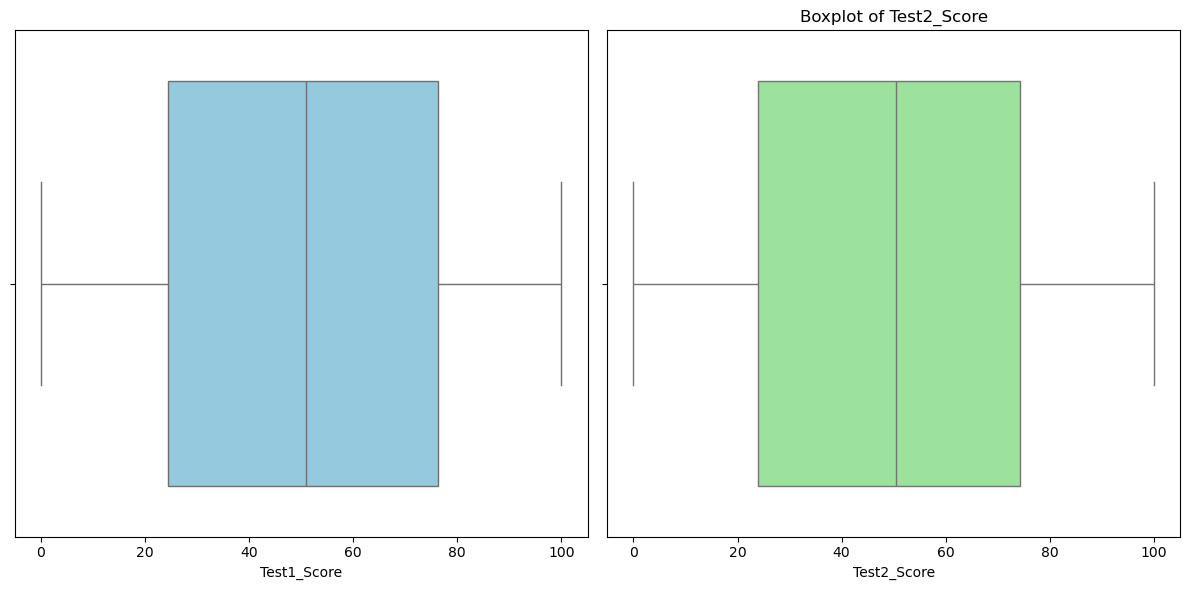

Test1_Score         0
Test2_Score         0
Admission_Status    0
dtype: int64

In [4]:
# check for missing values
missing_values = data.isnull().sum()

# boxplots to detect outliers
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=data['Test1_Score'], color='skyblue')

plt.subplot(1,2,2)
sns.boxplot(x=data['Test2_Score'], color='lightgreen')
plt.title('Boxplot of Test2_Score')

plt.tight_layout()
plt.show()

missing_values

#### Observations:
- Missing values: None of the column have missing values
- outliers: Box plot reveals a few potential outliers in both Test1 and Test2 Score, Particularly near extremes

Last Part is to handle the interquartile range (IQR) method and prepare the dataset for splitting into training and testing the datasets.

In [5]:
# Handling Outliers using IQR Method

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data_cleaned = remove_outliers(data,'Test1_Score')
data_cleaned = remove_outliers(data_cleaned,'Test2_Score')

#display
data_loss = data.shape[0] - data_cleaned.shape[0]
data_cleaned.shape,data_loss

((200, 3), 0)

In [7]:
from sklearn.model_selection import train_test_split

# now we will define features and target
X = data_cleaned[['Test1_Score','Test2_Score']]
y = data_cleaned['Admission_Status']

# Split into training and testing as mentioned 70% Train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)


In [8]:
# now we will process forward to Feature Scaling
from sklearn.preprocessing import StandardScaler

# We need to standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#now we need to build a logic regression model
from sklearn.linear_model import LogisticRegression

#Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

#### we need to Evaluate the model because it helps us understand how well the model performs and ensures that it meets the desired objective

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# predictions on test data
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

#metrics
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

#print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
precision: 1.00
recall: 0.88
f1-Score: 0.93
ROC-AUC: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.88      0.93        16

    accuracy                           0.97        60
   macro avg       0.98      0.94      0.96        60
weighted avg       0.97      0.97      0.97        60



#### We need to Visualize the Model results as evaluated and for that we will be following 2 steps:
- Decision Boundary
- ROC Curve

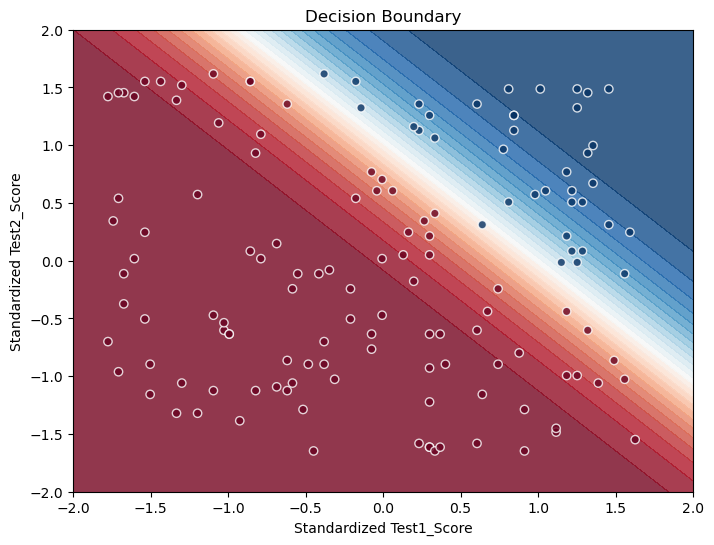

In [12]:
# Decision Boundary
#plot the decision boundary

xx, yy = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
grid = np.c_[xx.ravel(),yy.ravel()]
probs = model.predict_proba(grid)[:,-1].reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx,yy,probs,25,cmap="RdBu", alpha=0.8)
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=y_train,cmap="RdBu", edgecolor="white",alpha=0.8)
plt.title('Decision Boundary')
plt.xlabel('Standardized Test1_Score')
plt.ylabel('Standardized Test2_Score')
plt.show()

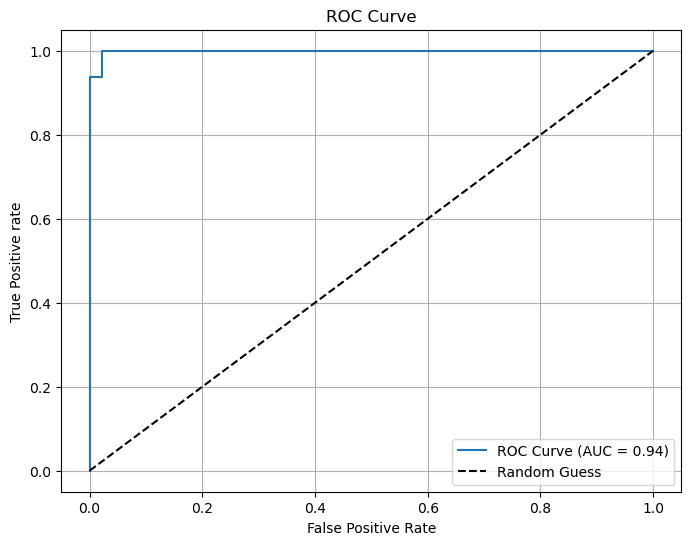

In [13]:
# Roc Curve
from sklearn.metrics import roc_curve
fpr, tpr, thrsholds, = roc_curve(y_test,y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

#### Test on New Data- 
Use sample new data (e.g., provided test scores) to predict Admission_Status <br>.- 
new_data = pd.DataFrame <br>({ <br>    'Test1_Score': [50, 75, 90, 3 <br>0   <br>     'Test2_Score': [40, 80, 95, <br> <br> 35 <br>]- 
})
Evaluate whether the predictions align with expectations.

In [14]:
# Test on new data
new_data = pd.DataFrame({
    'Test1_Score': [50, 75, 90, 30],
    'Test2_Score': [40, 80, 95, 35]
})

# Scale new data
new_data_scaled = scaler.transform(new_data)

#predict admission_status
new_predictions = model.predict(new_data_scaled)
new_probabilities = model.predict_proba(new_data_scaled)[:,1]

# display updated results
new_data['Admission_Predictions'] = new_predictions
new_data['Admission_Probability'] = new_probabilities

print(new_data)

   Test1_Score  Test2_Score  Admission_Predictions  Admission_Probability
0           50           40                      0               0.015828
1           75           80                      1               0.888217
2           90           95                      1               0.993056
3           30           35                      0               0.001361
